# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


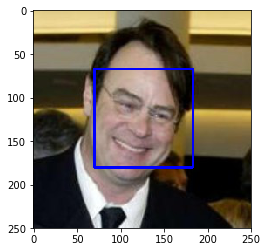

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#
num_humans_in_human_dataset = sum([int(face_detector(image)) for image in tqdm(human_files_short)])

print(f"{(num_humans_in_human_dataset/len(human_files_short)) * 100}% of the "\
      "images in the human dataset have a detected human face")

num_humans_in_dog_dataset = sum([int(face_detector(image)) for image in tqdm(dog_files_short)])

print(f"{(num_humans_in_dog_dataset/len(dog_files_short))*100}% of the "\
      "images in the dog dataset have a detected human face ")


  0%|          | 0/100 [00:00<?, ?it/s]

98.0% of the images in the human dataset have a detected human face


100%|██████████| 100/100 [00:30<00:00,  3.32it/s]

17.0% of the images in the dog dataset have a detected human face 


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [4]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:11<00:00, 47260732.26it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [5]:
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

class ImageTransformer:
    def __init__(self, transform):
        self.transform = transform
        
    def transform_image(self, img_path):
        image = Image.open(img_path)
        image = self.transform(image).float()
        image = Variable(image, requires_grad=True)
        return image.unsqueeze(0)
    

image_transformer = ImageTransformer(
    transform=transforms.Compose([transforms.RandomResizedCrop(224), 
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                       std=[0.229, 0.224, 0.225])]))
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    image = image_transformer.transform_image(img_path)

    if use_cuda:
        image = image.cuda()
    
    # Toggle the evaluation mode
    VGG16.eval()
    prediction = VGG16(image)
    
    return prediction.data.argmax() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [6]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediciton = VGG16_predict(img_path)
    dog_category_range = range(151, 269) # 268 inclusive
    return prediciton in dog_category_range # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [8]:
class DogDetectorVGG:
    def __init__(self):
        pass
    
    def eval_dog_detector(self):
        num_dogs_in_human_dataset = sum([int(dog_detector(image)) for image in tqdm(human_files_short)])
        print(f"{(num_dogs_in_human_dataset/len(human_files_short)) * 100}% of the "\
               "images in human dataset have a detected dog")

        num_dogs_in_dogs_dataset = sum([int(dog_detector(image)) for image in tqdm(dog_files_short)])
        print(f"{(num_dogs_in_dogs_dataset/len(dog_files_short)) * 100}% of the "\
               "images in the dog dataset have a detected dog")

dog_detector_vgg = DogDetectorVGG()
dog_detector_vgg.eval_dog_detector()

  3%|▎         | 3/100 [00:00<00:03, 24.99it/s]

0.0% of the images in human dataset have a detected dog


100%|██████████| 100/100 [00:04<00:00, 21.07it/s]

99.0% of the images in the dog dataset have a detected dog


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [9]:
# Tweaking the transform to Analyze performance on VGG 
print('Modifying the Transform from RandomResizedCrop to CenterCrop')
image_transformer.transform = transforms.Compose([transforms.CenterCrop(224), 
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                       std=[0.229, 0.224, 0.225])])

dog_detector_vgg.eval_dog_detector()

  3%|▎         | 3/100 [00:00<00:04, 21.13it/s]

Modifying the Transform from RandomResizedCrop to CenterCrop


  3%|▎         | 3/100 [00:00<00:03, 25.28it/s]

1.0% of the images in human dataset have a detected dog


100%|██████████| 100/100 [00:04<00:00, 25.27it/s]

91.0% of the images in the dog dataset have a detected dog


In [10]:
# Tweaking the transform to Analyze performance on VGG 
print('Modifying the Transform from RandomResizedCrop to Resize')
image_transformer.transform = transforms.Compose([transforms.Resize((224, 224)), 
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                       std=[0.229, 0.224, 0.225])])

dog_detector_vgg.eval_dog_detector()

  3%|▎         | 3/100 [00:00<00:03, 26.92it/s]

Modifying the Transform from RandomResizedCrop to Resize


  3%|▎         | 3/100 [00:00<00:03, 24.80it/s]

0.0% of the images in human dataset have a detected dog


100%|██████████| 100/100 [00:04<00:00, 23.46it/s]

100.0% of the images in the dog dataset have a detected dog


#### Evaluating RESNET50 Model

In [11]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

class ResNet50: 
    def __init__(self):
        self.model = models.resnet50(pretrained=True)
        self.use_cuda = torch.cuda.is_available()
        if self.use_cuda:
            self.model = self.model.cuda()


    def predict(self, img_path):
        data_transform = transforms.Compose([transforms.Resize((224, 224)), 
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                  std=[0.229, 0.224, 0.225])])

        image = image_transformer.transform_image(img_path)
        if self.use_cuda: 
            image = image.cuda()
        # Toggle the evaluation mode
        self.model.eval()
        prediction = self.model(image)

        return prediction.data.argmax() # predicted class index
    
    def eval_dog_detector(self, img_path):
        prediciton = self.predict(img_path)
        dog_category_range = range(151, 269) # 268 inclusive
        return prediciton in dog_category_range # true/false
        


In [12]:
resnet50_model = ResNet50()

num_dogs_in_human_dataset = sum([int(resnet50_model.eval_dog_detector(image)) for image in tqdm(human_files_short)])
print(f"{(num_dogs_in_human_dataset/len(human_files_short)) * 100}% of the "\
       "images in human dataset have a detected dog")

num_dogs_in_dogs_dataset = sum([int(resnet50_model.eval_dog_detector(image)) for image in tqdm(dog_files_short)])
print(f"{(num_dogs_in_dogs_dataset/len(dog_files_short)) * 100}% of the "\
       "images in the dog dataset have a detected dog")


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
  0%|          | 0/100 [00:00<?, ?it/s]

0.0% of the images in human dataset have a detected dog


100%|██████████| 100/100 [00:03<00:00, 30.01it/s]

100.0% of the images in the dog dataset have a detected dog


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [7]:
import os
from torchvision import datasets

## Specify appropriate transforms, and batch_sizes
data_dir = '/data/dog_images'
dirs = {
    'train': os.path.join(data_dir, 'train/'),
    'valid': os.path.join(data_dir, 'valid/'),
    'test' : os.path.join(data_dir, 'test/')
}

batch_size = 64

transform = {
    'train': transforms.Compose([transforms.Resize((256, 256)),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.RandomRotation(degrees=20),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]), 
    
    'valid': transforms.Compose([transforms.Resize((256, 256)),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(), 
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]),
    'test': transforms.Compose([transforms.Resize((256, 256)),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(), 
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])])
}

data = {
    'train': datasets.ImageFolder(dirs['train'], transform=transform['train']),
    'valid': datasets.ImageFolder(dirs['valid'], transform=transform['valid']),
    'test' : datasets.ImageFolder(dirs['test'], transform=transform['test'])
    
}

loaders_scratch = {
    'train': torch.utils.data.DataLoader(data['train'], batch_size=batch_size, shuffle=True),
    'valid': torch.utils.data.DataLoader(data['valid'], batch_size=batch_size, shuffle=True),
    'test' : torch.utils.data.DataLoader(data['test'], batch_size=batch_size, shuffle=True)
}

Number of Training Images: 6680
Number of Validation Images: 835
Number of Test Images: 836


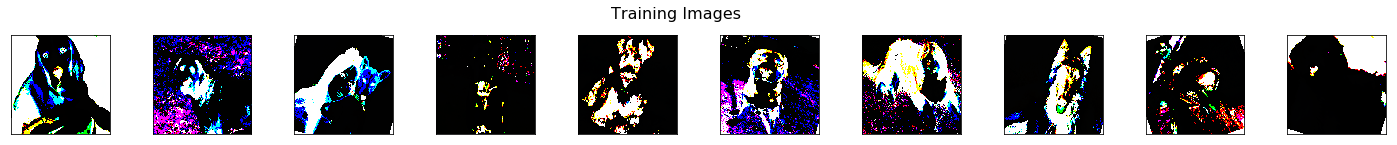

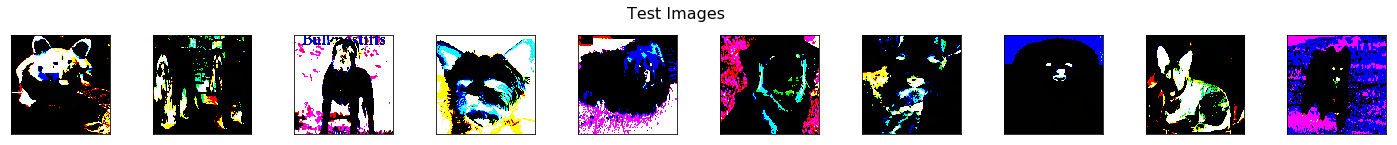

In [8]:
# Quick Visualization and Stats of loader 
num_training = len(data['train'])
num_validation = len(data['valid'])
num_test = len(data['test'])
print(f'Number of Training Images: {num_training}')
print(f'Number of Validation Images: {num_validation}')
print(f'Number of Test Images: {num_test}')


def plot_img(images, title):
    fig = plt.figure(figsize=(25, 4))
    fig.suptitle(title, fontsize=16)
    for idx in np.arange(10):
        ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
        plt.imshow(np.transpose(images[idx], (1, 2, 0)).astype('uint8'))
    

dataiter = iter(loaders_scratch['train'])
images, labels = dataiter.next()
train_images = images.numpy() # convert images to numpy for display
# plot the images in the train loader
plot_img(train_images, title='Training Images')

testiter = iter(loaders_scratch['test'])
images, labels = testiter.next()
test_images = images.numpy() # convert images to numpy for display
plot_img(test_images, title='Test Images')


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
* The Code applies a resizing operation. I chose 256x256 as the parameters of resizing, followed by center crop of 224x224 pixels. I chose the same size (i.e. 224x224) as the imagenet models (VGG, RESNET-50) and used the same Normalization parameter. 
* Yes, augmetation such as RandomRotation, RandomHorizontalFlip was applied to augment the training dataset. For the Validation and Test set, the only transformation applied was the Resize, CenterCrop and Normalization 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [9]:
import torch.nn as nn
import torch.nn.functional as F

use_cuda = torch.cuda.is_available()
# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.mp1   = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.mp2   = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.mp3   = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.mp4   = nn.MaxPool2d(kernel_size=2, stride=2)
        self.adaptive_pool = nn.AdaptiveAvgPool2d(output_size=(7,7))
        
        self.fc1 = nn.Linear(in_features=7*7*256, out_features=2048)
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(in_features=2048, out_features=512)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(in_features=512, out_features=len(loaders_scratch['train'].dataset.classes))
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.mp1(x)
        x = F.relu(self.conv2(x))
        x = self.mp2(x)
        x = F.relu(self.conv3(x))
        x = self.mp3(x)
        x = F.relu(self.conv4(x))
        x = self.mp4(x)
        x = self.adaptive_pool(x)
        
        x = x.view(x.size(0), -1)    
        
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
My Model is partly inspired by VGG16. Since the requirement for this task was to create a model from scratch with a test accuracy greater than 10%, I started with a single Convolutional Layer and a single fully connected layer. My approach was to look at the training and validation error and to gradually add more layers as necessary
1. Using a single convolutional layer did not help, as the model was not able learn much. The training and validation errors did not improve despite training for 15 epochs. This was expected, so I decided to add more convolutional layers
2. Next approach was to repeat the same process with 2 and 3 Convolutional Layers. I used a Max Pooling Layer with a `stride = 2` after every conv layer to reduce the number of parameters(dimensionality) . This again did not improve the errors and test accuracy.
3. I started seeing some results after the 4th conv layer was added. 
    * Started with `in_channel = 256` and `out_channel = 512`. This yielded promising results, however the training and validation errors had high oscillations. 
    * As I trained for more epochs, I also observed that training errors reduced drastically while validation error did not show any improvments (and in cases even increased). My guess is this is indicative of the model overfitting on training. 
    * While adding more layers to the fully-connected layers might have helped, I decided to keep my FC layer depth to 2. In order to reduce the dimensionality, I decided to tweak the out_channel of conv layer from `512` to `256`.
    * This still did not improve the situation described earlier. I decided to introduce an `AdaptivedAvgPool2D` and some `Dropout` layer between the fully connected layers
    * As a final tweak, I increased the number of fully connected layers from a depth of `2` to `3` with Dropouts. This helped increase the accuracy to over 10%


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [10]:
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.Adam(params=model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [19]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in tqdm(range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss = train_loss + (1/ (batch_idx + 1) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            with torch.no_grad():
                output = model(data)
                loss = criterion(output, target)
                valid_loss = valid_loss + (1/ (batch_idx + 1) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 	Training Loss: 3.613342 	Validation Loss: 3.756952
Validation loss decreased (inf --> 3.756952).  Saving model ...


  5%|▌         | 1/20 [01:37<30:51, 97.45s/it]

Epoch: 2 	Training Loss: 3.540690 	Validation Loss: 3.742390
Validation loss decreased (3.756952 --> 3.742390).  Saving model ...


 10%|█         | 2/20 [03:15<29:16, 97.59s/it]

Epoch: 3 	Training Loss: 3.472737 	Validation Loss: 3.563757
Validation loss decreased (3.742390 --> 3.563757).  Saving model ...


 20%|██        | 4/20 [06:30<26:01, 97.57s/it]

Epoch: 4 	Training Loss: 3.414176 	Validation Loss: 3.706125


 25%|██▌       | 5/20 [08:08<24:25, 97.68s/it]

Epoch: 5 	Training Loss: 3.358360 	Validation Loss: 3.589097


 30%|███       | 6/20 [09:45<22:46, 97.63s/it]

Epoch: 6 	Training Loss: 3.304751 	Validation Loss: 3.624775


 35%|███▌      | 7/20 [11:23<21:09, 97.64s/it]

Epoch: 7 	Training Loss: 3.248316 	Validation Loss: 3.622452
Epoch: 8 	Training Loss: 3.196142 	Validation Loss: 3.540419
Validation loss decreased (3.563757 --> 3.540419).  Saving model ...


 45%|████▌     | 9/20 [14:38<17:52, 97.47s/it]

Epoch: 9 	Training Loss: 3.129433 	Validation Loss: 3.565060


 50%|█████     | 10/20 [16:15<16:14, 97.40s/it]

Epoch: 10 	Training Loss: 3.077968 	Validation Loss: 3.613059
Epoch: 11 	Training Loss: 3.001710 	Validation Loss: 3.513401
Validation loss decreased (3.540419 --> 3.513401).  Saving model ...


 55%|█████▌    | 11/20 [17:53<14:37, 97.53s/it]

Epoch: 12 	Training Loss: 2.971865 	Validation Loss: 3.432938
Validation loss decreased (3.513401 --> 3.432938).  Saving model ...


 65%|██████▌   | 13/20 [21:08<11:22, 97.47s/it]

Epoch: 13 	Training Loss: 2.900689 	Validation Loss: 3.469769
Epoch: 14 	Training Loss: 2.847057 	Validation Loss: 3.400650
Validation loss decreased (3.432938 --> 3.400650).  Saving model ...


 75%|███████▌  | 15/20 [24:21<08:05, 97.02s/it]

Epoch: 15 	Training Loss: 2.775076 	Validation Loss: 3.472685


 80%|████████  | 16/20 [25:58<06:27, 96.91s/it]

Epoch: 16 	Training Loss: 2.733049 	Validation Loss: 3.566499


 85%|████████▌ | 17/20 [27:35<04:51, 97.08s/it]

Epoch: 17 	Training Loss: 2.669495 	Validation Loss: 3.448147


 90%|█████████ | 18/20 [29:12<03:14, 97.06s/it]

Epoch: 18 	Training Loss: 2.621534 	Validation Loss: 3.563174


 95%|█████████▌| 19/20 [30:49<01:37, 97.03s/it]

Epoch: 19 	Training Loss: 2.588587 	Validation Loss: 3.493743


100%|██████████| 20/20 [32:27<00:00, 97.21s/it]

Epoch: 20 	Training Loss: 2.507068 	Validation Loss: 3.537570


In [11]:
# load the model that got the best validation accuracy
if use_cuda:
    model_scratch.load_state_dict(torch.load('model_scratch.pt'))
else:
    model_scratch.load_state_dict(torch.load('model_scratch.pt',  map_location='cpu'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [12]:
# TO REMOVE 
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [13]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.457981


Test Accuracy: 17% (149/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [ ]:
## TODO: Specify data loaders

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [13]:
import torchvision.models as models
import torch.nn as nn

model_transfer = models.vgg19(pretrained=True)

# Freeze training of the feature extraction layer
for param in model_transfer.features.parameters():
    param.requires_grad = False

# Get the number of output of last fc layer in the model
num_output_last_fc_layer = list(model_transfer.classifier)[-1].out_features
num_classes = len(data['train'].classes) # Total number of output class

fc_layer = list(model_transfer.classifier)
fc_layer.extend([nn.ReLU(), 
                 nn.Dropout(p=0.5),
                 nn.Linear(in_features=num_output_last_fc_layer, out_features=512), 
                 nn.ReLU(),
                 nn.Dropout(p=0.5),
                 nn.Linear(in_features=512, out_features=num_classes)])

model_transfer.classifier = nn.Sequential(*fc_layer)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
        
# check if CUDA is available
if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.torch/models/vgg19-dcbb9e9d.pth
100%|██████████| 574673361/574673361 [00:44<00:00, 13009464.02it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
For this particular step, I used a pre-trained VGG19 model since in the previous steps VGGs gave a high accuracy. 
Here are the changes that were done: 
* The feature extraction layer was frozen by setting the `requires_grad` parameter to `False`. This is to ensure that during training(backpropogation), the feature extraction step is not changed/affected. The main motivation behind this is to prevent overfitting, and re-use the feature extractor in the pre-trained model. The only tweak applied here was to change the fully-connected layers. 
* The classifier of the image-net (VGG19 in this case) has `1000` classes, but our particular use-case (dog-breed classification) has `133`. For this reason I added two linear layers to the classifier, thereby making the final output nodes to be equal to the total number of classes i.e `133`
* I decided to go with 2 linear layer mainly to gradually reduce the `out_features`. This was done by first reducing the the features from `1000` to `512` and then from `512` to `133` with Dropouts and ReLU activate function like other layers. 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [14]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(params=model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [31]:
# train the model
model_transfer = train(15, loaders_scratch, model_transfer, optimizer_transfer, criterion_transfer, 
                       use_cuda, 'model_transfer.pt')


  0%|          | 0/15 [00:00<?, ?it/s]


Epoch: 1 	Training Loss: 4.473713 	Validation Loss: 2.914048
Validation loss decreased (inf --> 2.914048).  Saving model ...


  7%|▋         | 1/15 [02:02<28:34, 122.46s/it]

Epoch: 2 	Training Loss: 3.227311 	Validation Loss: 1.851367
Validation loss decreased (2.914048 --> 1.851367).  Saving model ...


 13%|█▎        | 2/15 [04:03<26:26, 122.04s/it]

Epoch: 3 	Training Loss: 2.801786 	Validation Loss: 1.691708
Validation loss decreased (1.851367 --> 1.691708).  Saving model ...


 20%|██        | 3/15 [06:05<24:22, 121.88s/it]

Epoch: 4 	Training Loss: 2.618114 	Validation Loss: 1.428442
Validation loss decreased (1.691708 --> 1.428442).  Saving model ...


 27%|██▋       | 4/15 [08:06<22:18, 121.69s/it]

Epoch: 5 	Training Loss: 2.492975 	Validation Loss: 1.374198
Validation loss decreased (1.428442 --> 1.374198).  Saving model ...


 33%|███▎      | 5/15 [10:07<20:15, 121.55s/it]

Epoch: 6 	Training Loss: 2.430342 	Validation Loss: 1.320516
Validation loss decreased (1.374198 --> 1.320516).  Saving model ...


 47%|████▋     | 7/15 [14:10<16:12, 121.53s/it]

Epoch: 7 	Training Loss: 2.297654 	Validation Loss: 1.385900


 53%|█████▎    | 8/15 [16:11<14:08, 121.22s/it]

Epoch: 8 	Training Loss: 2.316975 	Validation Loss: 1.337814
Epoch: 9 	Training Loss: 2.239874 	Validation Loss: 1.170514
Validation loss decreased (1.320516 --> 1.170514).  Saving model ...


 67%|██████▋   | 10/15 [20:13<10:05, 121.13s/it]

Epoch: 10 	Training Loss: 2.338488 	Validation Loss: 1.293194


 73%|███████▎  | 11/15 [22:14<08:04, 121.16s/it]

Epoch: 11 	Training Loss: 2.301151 	Validation Loss: 1.178253


 80%|████████  | 12/15 [24:16<06:03, 121.19s/it]

Epoch: 12 	Training Loss: 2.436481 	Validation Loss: 1.218003
Epoch: 13 	Training Loss: 2.323676 	Validation Loss: 1.156211
Validation loss decreased (1.170514 --> 1.156211).  Saving model ...


 87%|████████▋ | 13/15 [26:17<04:02, 121.26s/it]

Epoch: 14 	Training Loss: 2.379857 	Validation Loss: 1.100158
Validation loss decreased (1.156211 --> 1.100158).  Saving model ...


100%|██████████| 15/15 [30:21<00:00, 121.48s/it]

Epoch: 15 	Training Loss: 2.318782 	Validation Loss: 1.296345


In [15]:
# load the model that got the best validation accuracy (uncomment the line below)
if use_cuda:
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))
else: 
    model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location='cpu'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [17]:
test(loaders_scratch, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.222681


Test Accuracy: 62% (524/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [36]:
import random

data_transfer = data
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def get_predicted_dog_image_path(prediction_label):
    base_path = '/data/dog_images/train'
    path = os.path.join(base_path, data_transfer['train'].classes[prediction_label])
    files = os.listdir(path)
    return os.path.join(path, files[random.randrange(0, len(files))])


def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    model_transfer.eval()
    img_transformer = ImageTransformer(
        transform=transforms.Compose([transforms.Resize((224, 224)), 
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                       std=[0.229, 0.224, 0.225])]))
    
    image = img_transformer.transform_image(img_path)
    if use_cuda:
        image = image.cuda()
    prediction = model_transfer(image)
    prediction_label = prediction.data.argmax()
    dog_img_path = get_predicted_dog_image_path(prediction_label)

    return class_names[prediction_label], dog_img_path

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [98]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
def display_images(input_img_path, prediction_img_path):
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.set_axis_off()
    ax2.set_axis_off()
    input_img = cv2.imread(input_img_path)
    input_cv_rgb = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    ax1.imshow(input_cv_rgb, aspect=1)

    prediction_img = cv2.imread(prediction_img_path)
    prediction_cv_rgb = cv2.cvtColor(prediction_img, cv2.COLOR_BGR2RGB)
    ax2.imshow(prediction_cv_rgb, aspect=1)
    
    plt.show()

def get_true_dog_label(img_path):
    return img_path.split('/')[-2][4:].replace('_', ' ')

def detect_human(img_path):
    breed_prediction, dog_img_path = predict_breed_transfer(img_path)        
    print(f'hello, human! You look like a ...... {breed_prediction}')
    display_images(img_path, dog_img_path)
    
def detect_dog(img_path, print_true_label=True):
    breed_prediction, dog_img_path = predict_breed_transfer(img_path)
    print(f'hello, dog! your predicted breed is......... {breed_prediction} \n')
    if print_true_label:
        print(f'actual breed is .... {get_true_dog_label(img_path)}')
        
    display_images(img_path, dog_img_path)
    
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if face_detector(img_path):
        detect_human(img_path)
    elif dog_detector(img_path):
        detect_dog(img_path)
    else: 
        print('error :( ')
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
The output is better than I expected. The model despite having an accuracy of 63% does a good job at predicting the dog breeds well. Some of the breeds are very hard to say even for a human such as Black russian terrier and Kerry blue terrier in the example below. 
When an image containing both human and dog is given, the algorithm detects the human well. Interestingly bit the human and dog detector classifies it as the same breed. 
(Three possible points for improvement)
1. Use a more complex classifier in the transfer learning step to see if the accuracy improves. Try the same with other pre-trainied models. 
2. Have more training images and train the model for more epochs 
3. Build a classifier using transfer learning to detect if human/dog/both/neither is present in an image and use that instead of the cv2.CascadeClassifier.


hello, human! You look like a ...... Dachshund


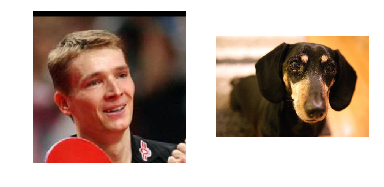

hello, human! You look like a ...... Pharaoh hound


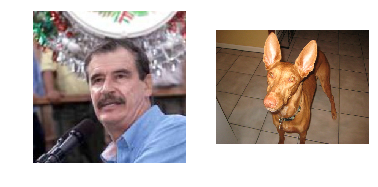

hello, human! You look like a ...... Chesapeake bay retriever


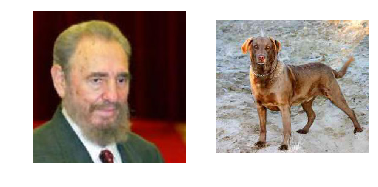

hello, human! You look like a ...... Dachshund


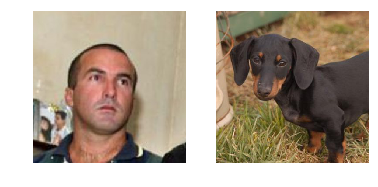

hello, human! You look like a ...... American staffordshire terrier


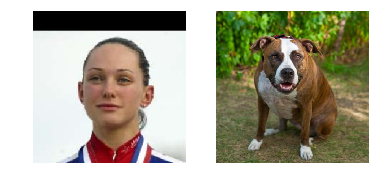

hello, dog! your predicted breed is......... Black russian terrier 

actual breed is .... Kerry blue terrier


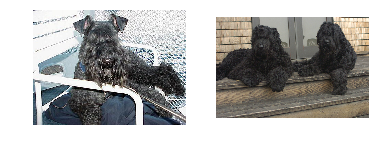

hello, dog! your predicted breed is......... French bulldog 

actual breed is .... French bulldog


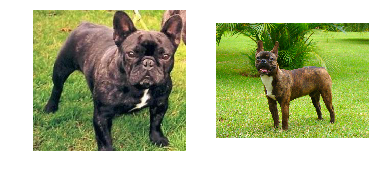

hello, dog! your predicted breed is......... Tibetan mastiff 

actual breed is .... Tibetan mastiff


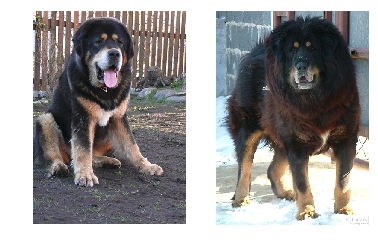

hello, dog! your predicted breed is......... Labrador retriever 

actual breed is .... Golden retriever


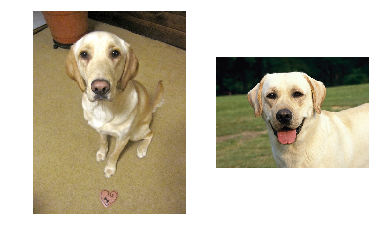

hello, dog! your predicted breed is......... Anatolian shepherd dog 

actual breed is .... Anatolian shepherd dog


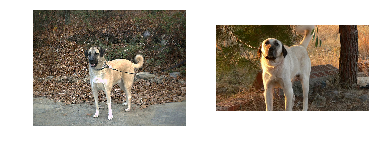

In [99]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for _ in range(5):
    index = random.randrange(0, len(human_files))
    run_app(human_files[index])

for _ in range(5):
    index = random.randrange(0, len(dog_files))
    run_app(dog_files[index])

hello, human! You look like a ...... Bloodhound


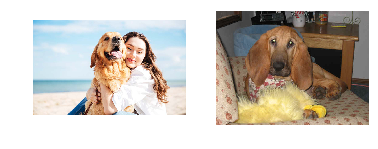

In [106]:
run_app('images/human_and_dog.jpg')

hello, dog! your predicted breed is......... Bloodhound 



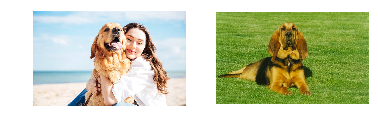

In [97]:
detect_dog('images/human_and_dog.jpg', print_true_label=False)